In [72]:
# 주요 라이브러리 import
# 동적크롤링-수업중-인스타 로그인
import warnings
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
#step1.selenium 패키지와 time 모듈 import
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
import time
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from bs4 import BeautifulSoup as bs
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
mnist['feature_names'][:5]

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5']

In [11]:
mnist_df=mnist['data']
mnist_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mnist_df.shape

(70000, 784)

In [14]:
target = mnist['target']
len(target)

70000

In [15]:
#X: '문제 데이터'를 대문자로 많이 씀!
#y: '정답 데이터'를 소문자로 많이 씀
X_train, X_test, y_train, y_test = mnist_df[:60000], mnist_df[60000:], target[:60000], target[60000:]

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train.shape

(60000,)

In [18]:
X_test.shape

(10000, 784)

In [19]:
y_test.shape

(10000,)

In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
# SGD: 확률적으로 제일 가능성이 높은 선을 구분선으로 정하는 방법

In [30]:
# 모델을 선정했으면, 객체를 생성하자
sgd_clf = SGDClassifier()

In [32]:
# 1. 훈련데이터로 공부시키자!
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [125]:
sgd_trainscore =sgd_clf.score(X_train, y_train)

In [127]:
# 2. 검증데이터로 검증해보자!
result = sgd_clf.predict(X_test)


In [128]:
#3. 답지와 정답을 비교해서 점수를 확인해보자!(체점해보자)
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(y_test, result)
sgd_accuracy
# ~~~~~~~~ml 끝~~~~~~~~~

0.9003571428571429

In [40]:
# 3. 실제 데이터로 확인해보자!

In [44]:
# accuracy
# 훈련용 데이터 점수, 검증용 데이터점수 비교해보아야 함. 
# 훈련용 점수 == 검증용, 일반화하기 괜찮음
# 훈련용 점수 > 검증용 점수, 훈련용 문제에 최적화되어, 다른 문제를 못 푸는 경우, 모델로 부적합
# 훈련용 점수< 검증용 점수, 다양한 문제 유횽을 풀 수 있는 모델이기 때문에 모델로 적합
# 한 set의 데이타로 일반화하면 안된다. 여러 데이터를 넣었을때 유사한 


In [64]:
## 훈련데이터와 검증용 데이터를 임의의 비율로 선별하여 다시 fit하여 정확도를 비요해보세요!
X_train2, X_test2, y_train2, y_test2 = mnist_df[:65000], mnist_df[65000:], target[:65000], target[65000:]
sgd_clf2 = SGDClassifier()
sgd_clf2.fit(X_train2, y_train2)

SGDClassifier()

In [65]:
X_test2

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
65000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
sgd2_train = sgd_clf2.score(X_train2, y_train2)

In [67]:
X_test2.shape

(5000, 784)

In [68]:
result2 = sgd_clf2.predict(X_test2)

In [159]:
sgd2_test = accuracy_score(y_test2, result2)
sgd2_test

0.8912

In [70]:
## Decision Tree 비교해보세요
from sklearn.tree import DecisionTreeClassifier

In [115]:
##max_depth: 5, 10, 15
tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(mnist_df,  #문제
                        target, #정답
                        test_size=0.2, #검증비율 20%, 훈련비율 80%
                        #stratify=True, #Target의 비율을 골고루 맞추어주는 역할!
                        random_state=100 #seed
                )

In [106]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [107]:
tree_clf.score(X_train, y_train)

0.9819821428571428

In [108]:
result_tree = tree_clf.predict(X_test)

In [109]:
accuracy_tree = accuracy_score(y_test, result_tree)

In [110]:
accuracy_tree

0.8767142857142857

In [120]:
####### max_depth 찾아보기 ###########

In [124]:
##max_depth: 5, 10, 15
train_acc=[]
test_acc=[]
for md in [13,14,15,16,17,18,19,20]:
    tree_clf = DecisionTreeClassifier(max_depth=md, random_state=42)
    tree_clf.fit(X_train, y_train) # 훈련데이터를 가지고 공부
    train_score=tree_clf.score(X_train, y_train) #훈련데이터 점수
    result_tree = tree_clf.predict(X_test) # 검증용 데이터로 공부
    accuracy_tree = accuracy_score(y_test, result_tree) # 검증용 데이터 점수
    train_acc.append(train_score)
    test_acc.append(accuracy_tree)
    print(md, "// train_score:", train_score, "//", "accuracy:", accuracy_tree)
print("train_acc>>",train_acc)
print("test_acc>>",test_acc)

13 // train_score: 0.9635178571428571 // accuracy: 0.8733571428571428
14 // train_score: 0.9744642857142857 // accuracy: 0.8752857142857143
15 // train_score: 0.9819821428571428 // accuracy: 0.8767142857142857
16 // train_score: 0.9866428571428572 // accuracy: 0.877
17 // train_score: 0.99 // accuracy: 0.8730714285714286
18 // train_score: 0.991625 // accuracy: 0.876
19 // train_score: 0.9924464285714286 // accuracy: 0.8747857142857143
20 // train_score: 0.9932142857142857 // accuracy: 0.8747142857142857
[0.9635178571428571, 0.9744642857142857, 0.9819821428571428, 0.9866428571428572, 0.99, 0.991625, 0.9924464285714286, 0.9932142857142857]
[0.8733571428571428, 0.8752857142857143, 0.8767142857142857, 0.877, 0.8730714285714286, 0.876, 0.8747857142857143, 0.8747142857142857]


In [130]:
sgd_trainscore, sgd_accuracy

(0.8951964285714286, 0.9003571428571429)

In [132]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

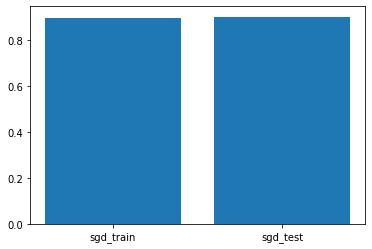

In [133]:
plt.bar(['sgd_train', 'sgd_test'], [sgd_trainscore, sgd_accuracy])

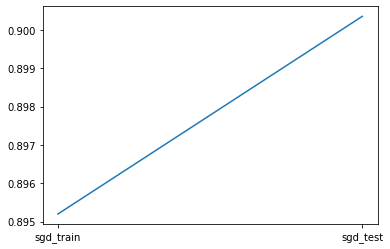

In [134]:
plt.plot(['sgd_train', 'sgd_test'], [sgd_trainscore, sgd_accuracy])

In [160]:
trainscores = [sgd_trainscore, sgd2_train]
trainscores.extend(train_acc)
trainscores

testscore_list = [sgd_accuracy, sgd2_test]
testscore_list.extend(test_acc)
testscore_list

[0.9003571428571429,
 0.8912,
 0.8733571428571428,
 0.8752857142857143,
 0.8767142857142857,
 0.877,
 0.8730714285714286,
 0.876,
 0.8747857142857143,
 0.8747142857142857]

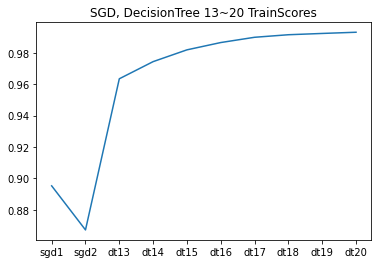

In [161]:
plt.plot(['sgd1','sgd2', 'dt13','dt14','dt15','dt16','dt17','dt18','dt19','dt20'], trainscores)
plt.title("SGD, DecisionTree 13~20 TrainScores")
plt.show()

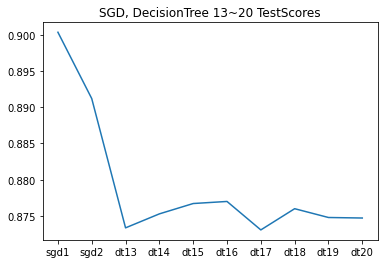

In [162]:
plt.plot(['sgd1', 'sgd2', 'dt13','dt14','dt15','dt16','dt17','dt18','dt19','dt20'], testscore_list)
plt.title("SGD, DecisionTree 13~20 TestScores")
plt.show()

In [164]:
diff = []
for i in range (len(testscore_list)):
    diff.append(testscore_list[i]-trainscores[i])
diff

[0.005160714285714296,
 0.024123076923076914,
 -0.09016071428571426,
 -0.09917857142857134,
 -0.10526785714285714,
 -0.10964285714285715,
 -0.11692857142857138,
 -0.11562499999999998,
 -0.11766071428571434,
 -0.11850000000000005]

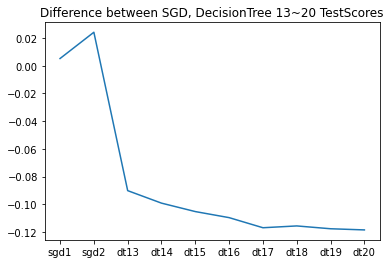

In [165]:
plt.plot(['sgd1', 'sgd2', 'dt13','dt14','dt15','dt16','dt17','dt18','dt19','dt20'], diff)
plt.title("Difference between SGD, DecisionTree 13~20 TestScores")
plt.show()

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz
